Imports

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

1. Data Wrangling

In [216]:
# import users data
users = pd.read_csv('takehome_users.csv', encoding='mac-roman')

In [217]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


This table contains data for 12,000 users who signed up for the product in the last two years.

In [218]:
# import user engagement data
engagement = pd.read_csv('takehome_user_engagement.csv')
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


This table contains a row for each day a user logged in.

## Project Instructions
Defining an adopted user as a user who logged into the product on three separate days in at least one seven day period, identify which factors predict future user adoption.

### 1. Identify "Adopted" users from Engagement table

In [219]:
# confirm dtypes of table
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [220]:
# convert datetime to appropriate dtype
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])

In [221]:
# Let's create a column 
# define a function to see if a user logged in on 3 seperate days in a 7-day period.
def logins_in_days(df, days=7, logins=3):
    from datetime import timedelta
    # first drop duplicate days and sort by day
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    # calculate how many days has passed for every 3 logins
    passed_days = df['date'].diff(periods=logins-1)
    # check if any passed time is less than 7 days
    return any(passed_days <= timedelta(days=days))


In [222]:
# run the function on all users
adopted = engagement.groupby('user_id').apply(logins_in_days)
adopted.name = 'adopted_user'

In [223]:
print('There were {} adopted users out of {} users'.format(
    sum(adopted), len(adopted)))

There were 1656 adopted users out of 8823 users


### Join User Data with Adopted Users

In [224]:
data = adopted.reset_index().merge(users, left_on='user_id', right_on='object_id')

In [225]:
data['adopted_user'] = data['adopted_user'].replace([True, False], [1, 0])

In [226]:
data.head()

,user_id,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,0,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,0,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,0,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


<Axes: >

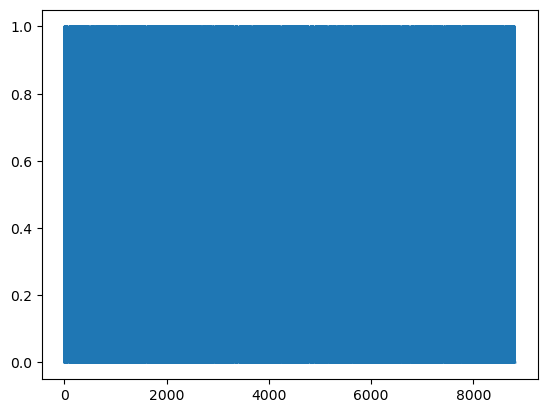

In [227]:
data['adopted_user'].plot()

### Drop Unnecessary Columns

In [228]:
# drop unnecessary columns
cols = ['user_id', 'object_id', 'name', 'email']

data = data.drop(columns=cols)

In [229]:
data.head()

,adopted_user,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,0,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,1,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,0,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,0,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,0,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   adopted_user                8823 non-null   int64  
 1   creation_time               8823 non-null   object 
 2   creation_source             8823 non-null   object 
 3   last_session_creation_time  8823 non-null   float64
 4   opted_in_to_mailing_list    8823 non-null   int64  
 5   enabled_for_marketing_drip  8823 non-null   int64  
 6   org_id                      8823 non-null   int64  
 7   invited_by_user_id          4776 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 620.4+ KB


### Handle Data Types & Feature Engineering

In [231]:
# convert datetime objects
data['creation_time'] = pd.to_datetime(data['creation_time'])
data['last_session_creation_time'] = pd.to_datetime(data['last_session_creation_time'], unit='s')

In [232]:
data['user_history_in_days'] = data['last_session_creation_time'] - data['creation_time']
data['user_history_in_days'] = data['user_history_in_days'].dt.days

In [233]:
# Drop datetime features
data = data.drop([*data.select_dtypes(include='datetime').columns.to_list(), 'org_id', 'invited_by_user_id'], axis=1)

### Encode Categorical Variables

In [234]:
# Encode categorical variables

data = pd.get_dummies(data)

In [235]:
data.head()

,adopted_user,opted_in_to_mailing_list,enabled_for_marketing_drip,user_history_in_days,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,0,1,0,0,1,0,0,0,0
1,1,0,0,136,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,1,1,0,0,0,0
4,0,0,0,5,1,0,0,0,0


### Create Feature Matrix and Target Labels

In [236]:
X = data.drop('adopted_user', axis=1)
y = data['adopted_user']

In [237]:
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,user_history_in_days,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,0,1,0,0,0,0
1,0,0,136,0,1,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,1,1,0,0,0,0
4,0,0,5,1,0,0,0,0


Predictive Model

A Random Forest model will be used since it can handle the numeric features with different scales.

In [238]:
# import functions
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [239]:
# Create train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [240]:
# Create param grid 
model = RandomForestClassifier()

grid = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_depth': [10, 20, 40, 60],
    'min_samples_leaf': [1, 2, 4]
}

cv = GridSearchCV(model, grid, cv=5)
cv.fit(X_train, y_train)

print(f"The best params from the best performing model are: {cv.best_params_}")

The best params from the best performing model are: {'max_depth': 60, 'min_samples_leaf': 4, 'n_estimators': 25}


In [241]:
# Get preds from best model
best_model = cv.best_estimator_
preds = best_model.predict(X_test)

In [242]:
# Evaluate predictions 
from sklearn.metrics import classification_report, accuracy_score

print(f"{classification_report(y_test, preds)} \n Accuracy: {accuracy_score(y_test, preds)}")

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1434
           1       0.92      0.88      0.90       331

    accuracy                           0.96      1765
   macro avg       0.95      0.93      0.94      1765
weighted avg       0.96      0.96      0.96      1765
 
 Accuracy: 0.9631728045325779


In [243]:
# Get feature importances

# take a look at feature importance
important_features = pd.Series(best_model.feature_importances_, index=X.columns)
important_features = important_features.sort_values(ascending=False)
print(important_features)

user_history_in_days                  0.990606
opted_in_to_mailing_list              0.002052
enabled_for_marketing_drip            0.001828
creation_source_GUEST_INVITE          0.001486
creation_source_SIGNUP                0.001234
creation_source_PERSONAL_PROJECTS     0.001100
creation_source_SIGNUP_GOOGLE_AUTH    0.000857
creation_source_ORG_INVITE            0.000837
dtype: float64


<Axes: >

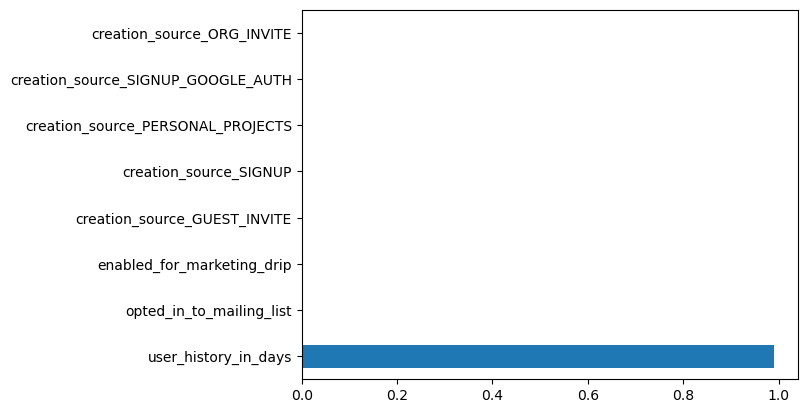

In [244]:
important_features.plot(kind='barh')

From the results, it seems that the best indicator for future user adoption seems to be the number of days for the user history. 
For more optimized results, some next steps should include testing different models and perhaps getting more information about users that can be useful in the model.